In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
# import seaborn as sns
import os.path as path
import os
# import matplotlib
# import matplotlib.font_manager
# import matplotlib.pyplot as plt # graphs plotting
# import Bio
from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline

from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score


# from matplotlib import rc
# # for Arial typefont
# matplotlib.rcParams['font.family'] = 'Arial'

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean

import seaborn as sns

import itertools
from itertools import product

## for Palatino and other serif fonts use:
# rc('font',**{'family':'serif','serif':['Palatino']})
# matplotlib.rcParams['mathtext.fontset'] = 'cm'

## for LaTeX typefont
# matplotlib.rcParams['mathtext.fontset'] = 'stix'
# matplotlib.rcParams['font.family'] = 'STIXGeneral'

## for another LaTeX typefont
# rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

# rc('text', usetex = True)

print("done")

done


In [2]:
sequences2 = np.load('/Users/pchourasia1/Desktop/Host_Classification/Data Processing/ALIGNED_sequences.npy',allow_pickle=True)
attributes = np.load('/Users/pchourasia1/Desktop/Host_Classification/Data Processing/attributes.npy',allow_pickle=True)

In [3]:
host_names = attributes[:]

In [4]:
len(host_names), len(sequences2)

(5558, 5558)

In [5]:
cc = []
for i in range(len(sequences2)):
#     aa = encoded_sequences[i]
    cc.append(len(sequences2[i]))

In [6]:
np.unique(cc)

array([3498])

In [11]:
# We create a class fasta_sequence so that we would be able to use the sequence data easily 

class fasta_sequence:
    def __init__(self, sequence, type_of_encoding = "onehot"):
        
        # we read the input data
        
        self.sequence = sequence


        def encoding(sequence, type_of_encoding):

            # define universe of possible input values
#             alphabet = 'ABCDEFGHIJKLMNPQRSTUVWXYZ-'
            alphabet = 'ABCDEFGHIJKLMNPQRSTVWXYZ-'
            # define a mapping of chars to integers
            char_to_int = dict((c, i) for i, c in enumerate(alphabet))


            # integer encoding
            integer_encoded = [char_to_int[char] for char in sequence]

            # one-hot encoding
            onehot_encoded = list()
            for value in integer_encoded:
                letter = [0 for _ in range(len(alphabet)-1)]
                if value != len(alphabet)-1:
                    letter[value] = 1
                onehot_encoded.append(letter)
            flat_list = [item for sublist in onehot_encoded for item in sublist]

            if type_of_encoding == "onehot":
                return flat_list
            else:
                return integer_encoded
            
        #  we use the encoding function to create a new attribute for the sequence -- its encoding        
        self.encoded = encoding(sequence, type_of_encoding)
        
print("done")

done


In [12]:
# we create a list of sequences as objects of the class fasta_sequence
# all sequences are encoded with one-hot encoding (it is the default option of the constructor of the class)
prot_seq = sequences2[:]
sequences = []
for i in range(0, len(prot_seq)):
    current_sequence = fasta_sequence(prot_seq[i])
    sequences.append(current_sequence)
    
print("done")

done


In [13]:
# for a list of sequences, returns a list of encoded sequences and a list of targets

def EncodeAndTarget(list_of_sequences):
    # encoding the sequences
    list_of_encoded_sequences = [entry.encoded for entry in list_of_sequences]
    return list_of_encoded_sequences   

encoded_sequences = EncodeAndTarget(sequences)

In [14]:
len(encoded_sequences[0]),len(encoded_sequences),type(encoded_sequences),type(encoded_sequences[0])

(83952, 5558, list, list)

In [15]:
cc = []
for i in range(len(encoded_sequences)):
    aa = encoded_sequences[i]
    cc.append(sum(aa))

In [16]:
np.unique(cc)

array([   9,   10,   12,   19,   23,   57,   85,  133,  157,  198,  268,
        328,  386,  762,  922,  959, 1119, 1126, 1128, 1130, 1131, 1137,
       1138, 1139, 1142, 1153, 1154, 1156, 1157, 1158, 1159, 1160, 1161,
       1162, 1163, 1164, 1165, 1166, 1167, 1168, 1169, 1170, 1171, 1173,
       1175, 1177, 1179, 1180, 1186, 1190, 1191, 1192, 1193, 1200, 1203,
       1206, 1207, 1212, 1214, 1217, 1220, 1221, 1226, 1227, 1232, 1235,
       1236, 1237, 1238, 1241, 1242, 1245, 1246, 1251, 1252, 1254, 1255,
       1256, 1257, 1259, 1264, 1265, 1266, 1267, 1268, 1269, 1270, 1271,
       1272, 1273, 1274, 1275, 1276, 1280, 1282, 1290, 1317, 1324, 1327,
       1328, 1329, 1330, 1331, 1334, 1339, 1344, 1345, 1346, 1347, 1349,
       1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360,
       1361, 1362, 1363, 1364, 1365, 1366, 1368, 1372, 1373, 1374, 1375,
       1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386,
       1387, 1388, 1390, 1391, 1399, 1426, 1436, 14

In [17]:
pd.DataFrame(aa).isnull().values.any()

False

In [18]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt # graphs plotting
import matplotlib.cm as cm
import seaborn as sns

# We embed all our sequences into 2D vectors with help of TSNE
X_embedded_orig = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(encoded_sequences)
# X_embedded = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(Ridge_Regression_data)

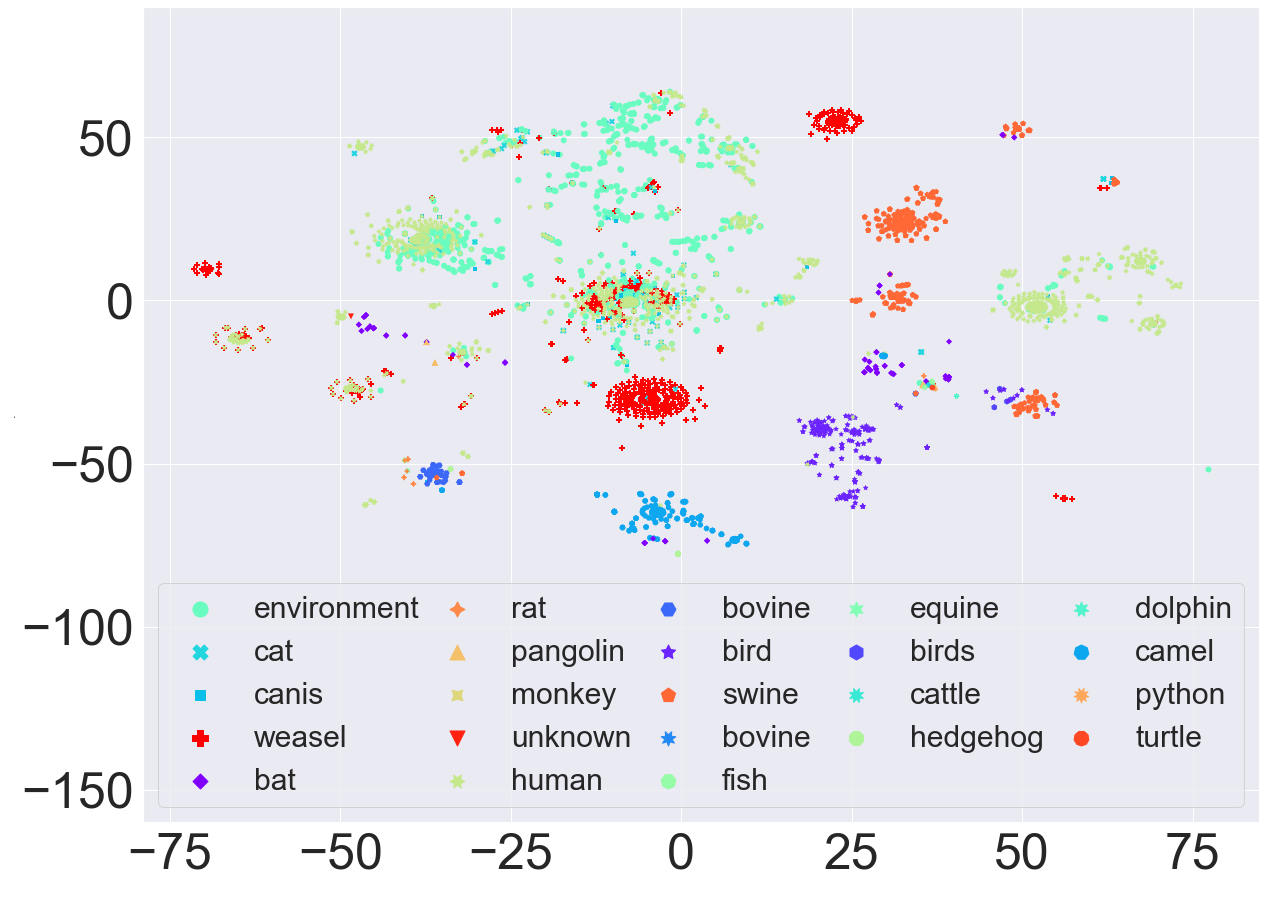

In [19]:
# az = host_names_new
az = attributes[:]
# az = month_names_few_final
# X_embedded_orig_final2 = np.array(X_embedded)
X_embedded_orig_final2 = np.array(X_embedded_orig)

colors = cm.rainbow(np.linspace(0, 1, len(np.unique(az))))
len(np.unique(az))

hst = np.unique(az)
order_top_hosts =  az

colors_top_hosts = {hst[0] : colors[0], hst[1] : colors[1],
                      hst[2] : colors[2], hst[3]: colors[3],  
                      hst[4] : colors[4],
hst[5]:colors[5],
hst[6]:colors[6],
hst[7]:colors[7],
hst[8]:colors[8],
hst[9]:colors[9],
hst[10]:colors[10],
hst[11]:colors[11],
hst[12]:colors[12],
hst[13]:colors[13],
hst[14]:colors[14],
hst[15]:colors[15],
hst[16]:colors[16],
hst[17]:colors[17],
hst[18]:colors[18],
hst[19]:colors[19],
hst[20]:colors[20],
hst[21]:colors[21],
hst[22]:colors[22]
}


data_frame_top_hosts = pd.DataFrame({' ': 
                                   np.array(X_embedded_orig_final2[:,0]), 
                           '.': np.array(X_embedded_orig_final2[:,1]), 
                           'Variants:': az})

sns.set(rc={'figure.figsize':(20,15)})

sns.scatterplot(x = ' ', 
            y = '.', 
            hue = 'Variants:', 
            hue_order = order_top_hosts,
#             markers = ordered_markers_top_hosts,
            palette = colors_top_hosts,
            data = data_frame_top_hosts,           
#             legend = 'full',
#             ax = ax12,
#             s = 100,
            linewidth=0.01,
            style = 'Variants:')
plt.ylim(-160, 90)
# plt.xlim(-80, 80)
# plt.xlabel("Steps Taken Per Day", fontsize=14)
# plt.ylabel("Calories Burned Per Day", fontsize=14)
plt.tick_params(labelsize=50)
# plt.legend(fontsize=0)
# plt.legend(fontsize=30, mode = "expand", ncol = 5)
# lgnd = plt.legend(loc="lower left", numpoints=1, fontsize=10)

lgnd = plt.legend(loc="lower left", scatterpoints=1, fontsize=30, mode = "expand", ncol = 5)
for handle in lgnd.legendHandles:
    handle.set_sizes([226.0])

write_path = "host_kmers_clustering_tnse_plot.png"

plt.savefig(write_path)

# Classification Functions

In [20]:
# In[4]
def roc_auc_score_multiclass(actual_class, pred_class, average = "macro"):

    unique_class = set(actual_class)
    roc_auc_dict = {}
    for per_class in unique_class:
        #creating a list of all the classes except the current class 
        other_class = [x for x in unique_class if x != per_class]

        #marking the current class as 1 and all other classes as 0
        new_actual_class = [0 if x in other_class else 1 for x in actual_class]
        new_pred_class = [0 if x in other_class else 1 for x in pred_class]

        #using the sklearn metrics method to calculate the roc_auc_score
        roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average)
        roc_auc_dict[per_class] = roc_auc
    
    
    check = pd.DataFrame(roc_auc_dict.items())
    return mean(check)

def svm_fun_kernel(X_train,y_train,X_test,y_test,kernel_mat):

#     clf = svm.SVC()
    clf = svm.SVC(kernel=kernel_mat)
    
    #Train the model using the training sets
    clf.fit(kernel_mat, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    svm_acc = metrics.accuracy_score(y_test, y_pred)
#     print("SVM Accuracy:",svm_acc)
    
    svm_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("SVM Precision:",svm_prec)
    
    svm_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("SVM Recall:",svm_recall)

    svm_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("SVM F1 Weighted:",svm_f1_weighted)
    
    svm_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("SVM F1 macro:",svm_f1_macro)
    
    svm_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("SVM F1 micro:",svm_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix SVM : \n", confuse)
    print("SVM Kernel Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
#    print(macro_roc_auc_ovo[1])
    check = [svm_acc,svm_prec,svm_recall,svm_f1_weighted,svm_f1_macro,svm_f1_micro,macro_roc_auc_ovo[1]]
    return(check)
    
# In[5]
##########################  SVM Classifier  ################################
def svm_fun(X_train,y_train,X_test,y_test):
    #Create a svm Classifier
    clf = svm.SVC(kernel='linear') # Linear Kernel

    #Train the model using the training sets
    clf.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = clf.predict(X_test)
    
    svm_acc = metrics.accuracy_score(y_test, y_pred)
#     print("SVM Accuracy:",svm_acc)
    
    svm_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("SVM Precision:",svm_prec)
    
    svm_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("SVM Recall:",svm_recall)

    svm_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("SVM F1 Weighted:",svm_f1_weighted)
    
    svm_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("SVM F1 macro:",svm_f1_macro)
    
    svm_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("SVM F1 micro:",svm_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix SVM : \n", confuse)
    print("SVM Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
#    print(macro_roc_auc_ovo[1])
    check = [svm_acc,svm_prec,svm_recall,svm_f1_weighted,svm_f1_macro,svm_f1_micro,macro_roc_auc_ovo[1]]
    return(check)
    


# In[5]
##########################  NB Classifier  ################################
def gaus_nb_fun(X_train,y_train,X_test,y_test):
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)


    NB_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Gaussian NB Accuracy:",NB_acc)

    NB_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Gaussian NB Precision:",NB_prec)
    
    NB_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Gaussian NB Recall:",NB_recall)
    
    NB_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Gaussian NB F1 weighted:",NB_f1_weighted)
    
    NB_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Gaussian NB F1 macro:",NB_f1_macro)
    
    NB_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Gaussian NB F1 micro:",NB_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix NB : \n", confuse)
    print("NB Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    check = [NB_acc,NB_prec,NB_recall,NB_f1_weighted,NB_f1_macro,NB_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

# In[5]
##########################  MLP Classifier  ################################
def mlp_fun(X_train,y_train,X_test,y_test):
    # Feature scaling
    scaler = StandardScaler()  
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)  
    X_test_2 = scaler.transform(X_test)


    # Finally for the MLP- Multilayer Perceptron
    mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000)  
    mlp.fit(X_train, y_train)


    y_pred = mlp.predict(X_test_2)
    
    MLP_acc = metrics.accuracy_score(y_test, y_pred)
#     print("MLP Accuracy:",MLP_acc)
    
    MLP_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("MLP Precision:",MLP_prec)
    
    MLP_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("MLP Recall:",MLP_recall)
    
    MLP_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("MLP F1:",MLP_f1_weighted)
    
    MLP_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("MLP F1:",MLP_f1_macro)
    
    MLP_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("MLP F1:",MLP_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix MLP : \n", confuse)
    print("MLP Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [MLP_acc,MLP_prec,MLP_recall,MLP_f1_weighted,MLP_f1_macro,MLP_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

# In[5]
##########################  knn Classifier  ################################
def knn_fun(X_train,y_train,X_test,y_test):
    classifier = KNeighborsClassifier(n_neighbors=5)
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    knn_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Knn Accuracy:",knn_acc)
    
    knn_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Knn Precision:",knn_prec)
    
    knn_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Knn Recall:",knn_recall)
    
    knn_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Knn F1 weighted:",knn_f1_weighted)
    
    knn_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Knn F1 macro:",knn_f1_macro)
    
    knn_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Knn F1 micro:",knn_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix KNN : \n", confuse)
    print("KNN Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [knn_acc,knn_prec,knn_recall,knn_f1_weighted,knn_f1_macro,knn_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

# In[5]
##########################  Random Forest Classifier  ################################
def rf_fun(X_train,y_train,X_test,y_test):
    # Import the model we are using
    from sklearn.ensemble import RandomForestClassifier
    # Instantiate model with 1000 decision trees
    rf = RandomForestClassifier(n_estimators = 100)
    # Train the model on training data
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    fr_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Random Forest Accuracy:",fr_acc)
    
    fr_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Random Forest Precision:",fr_prec)
    
    fr_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Random Forest Recall:",fr_recall)
    
    fr_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Random Forest F1 weighted:",fr_f1_weighted)
    
    fr_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Random Forest F1 macro:",fr_f1_macro)
    
    fr_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Random Forest F1 micro:",fr_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix RF : \n", confuse)
    print("RF Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [fr_acc,fr_prec,fr_recall,fr_f1_weighted,fr_f1_macro,fr_f1_micro,macro_roc_auc_ovo[1]]
    return(check)

# In[5]
    ##########################  Logistic Regression Classifier  ################################
def lr_fun(X_train,y_train,X_test,y_test):

    model = LogisticRegression(solver='liblinear', random_state=0)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    LR_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Logistic Regression Accuracy:",LR_acc)
    
    LR_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Precision:",LR_prec)
    
    LR_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Recall:",LR_recall)
    
    LR_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression F1 weighted:",LR_f1_weighted)
    
    LR_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Logistic Regression F1 macro:",LR_f1_macro)
    
    LR_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Logistic Regression F1 micro:",LR_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix LR : \n", confuse)
    print("LR Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [LR_acc,LR_prec,LR_recall,LR_f1_weighted,LR_f1_macro,LR_f1_micro,macro_roc_auc_ovo[1]]
    return(check)


def fun_decision_tree(X_train,y_train,X_test,y_test):
    from sklearn import tree
    
    clf = tree.DecisionTreeClassifier()    
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    
    dt_acc = metrics.accuracy_score(y_test, y_pred)
#     print("Logistic Regression Accuracy:",LR_acc)
    
    dt_prec = metrics.precision_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Precision:",LR_prec)
    
    dt_recall = metrics.recall_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression Recall:",LR_recall)
    
    dt_f1_weighted = metrics.f1_score(y_test, y_pred,average='weighted')
#     print("Logistic Regression F1 weighted:",LR_f1_weighted)
    
    dt_f1_macro = metrics.f1_score(y_test, y_pred,average='macro')
#     print("Logistic Regression F1 macro:",LR_f1_macro)
    
    dt_f1_micro = metrics.f1_score(y_test, y_pred,average='micro')
#     print("Logistic Regression F1 micro:",LR_f1_micro)
    
    confuse = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix DT : \n", confuse)
    print("DT Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))
    ######################## Compute ROC curve and ROC area for each class ################
    y_prob = y_pred
    macro_roc_auc_ovo = roc_auc_score_multiclass(y_test, y_prob, average='macro')
    
    check = [dt_acc,dt_prec,dt_recall,dt_f1_weighted,dt_f1_macro,dt_f1_micro,macro_roc_auc_ovo[1]]
    return(check)


In [21]:
unique_hst = list(np.unique(host_names))
len(unique_hst)

23

In [22]:

int_hosts = []
for ind_unique in range(len(host_names)):
    variant_tmp = host_names[ind_unique]
    ind_tmp = unique_hst.index(variant_tmp)
    int_hosts.append(ind_tmp)
    
print("Attribute data preprocessing Done")

Attribute data preprocessing Done


In [23]:
X = np.array(encoded_sequences)
y = np.array(int_hosts)

In [24]:
X.shape, len(y), len(X[0])

((5558, 83952), 5558, 83952)

In [25]:
# print("Accuracy   Precision   Recall   F1 (weighted)   F1 (Macro)   F1 (Micro)   ROC AUC")
svm_table = []
gauu_nb_table = []
mlp_table = []
knn_table = []
rf_table = []
lr_table = []
dt_table = []


from sklearn.model_selection import ShuffleSplit # or StratifiedShuffleSplit
sss = ShuffleSplit(n_splits=1, test_size=0.3)
sss.get_n_splits(X, y)
train_index, test_index = next(sss.split(X, y)) 

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [26]:
import timeit

start = timeit.default_timer()
gauu_nb_return = gaus_nb_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("NB Time : ", stop - start) 

start = timeit.default_timer()
mlp_return = mlp_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("MLP Time : ", stop - start) 

start = timeit.default_timer()
knn_return = knn_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("KNN Time : ", stop - start) 

start = timeit.default_timer()
rf_return = rf_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("RF Time : ", stop - start) 

start = timeit.default_timer()
lr_return = lr_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("LR Time : ", stop - start) 

start = timeit.default_timer()
dt_return = fun_decision_tree(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("DT Time : ", stop - start) 

start = timeit.default_timer()
svm_return = svm_fun(X_train,y_train,X_test,y_test)
stop = timeit.default_timer()
print("SVM Time : ", stop - start) 

gauu_nb_table.append(gauu_nb_return)
mlp_table.append(mlp_return)
knn_table.append(knn_return)
rf_table.append(rf_return)
lr_table.append(lr_return)
dt_table.append(dt_return)
svm_table.append(svm_return)
     
svm_table_final = DataFrame(svm_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
gauu_nb_table_final = DataFrame(gauu_nb_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
mlp_table_final = DataFrame(mlp_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
knn_table_final = DataFrame(knn_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
rf_table_final = DataFrame(rf_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])
lr_table_final = DataFrame(lr_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])

dt_table_final = DataFrame(dt_table, columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"])


C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-20-cec0359551a8>:130: RuntimeWarning: invalid value encountered in true_divide
  print("NB Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))


Confusion Matrix NB : 
 [[ 48   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
    1   0]
 [  0  92   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  91   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  2   0   0   0   0   0   4   0   4   0   0   2   4   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   2  21   0   8   0   0   3   9   0   0   0   0   0
    0   2]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  1   0   0   0   0   0   4   0 297   0   0   6  24   0   0   0   0   0
    0   1]
 [  0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   6  17   0 314   0

C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix MLP : 
 [[ 19   0   0   0   1   0   0   0   0   0   0   2   2   0   0  25   0   0
    1]
 [  0  89   0   0   1   0   0   0   0   0   0   1   0   0   0   1   0   0
    0]
 [  0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   3   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  26   0   0
    0]
 [  0   0   0   0  81   0   0   0   0   0   0   0   0   0   0  10   0   0
    0]
 [  0   0   0   0   0   0   7   0   0   0   0   4   0   0   0   0   0   0
    5]
 [  0   0   0   0   0   0  15   0   5   0   0  11   0   0   0   0   0   0
   14]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   3   0 219   0   0  81   0   0   0   2   0   0
   28]
 [  0   0   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   1   0   0   0   0   0   3   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   1   1   5   0  18   0   0 399   0   0   0   0   0   0
  103]
 [ 

C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix KNN : 
 [[ 42   0   0   0   4   0   0   0   1   0   0   1   2   0   0   0   0   0
    0]
 [  0  90   0   0   0   0   0   0   0   0   0   0   1   0   0   1   0   0
    0]
 [  0   2   0   0   0   0   0   0   0   0   0   0   1   0   0   1   0   0
    0]
 [  0   0   0  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  91   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   6   0   1   0   0   6   2   0   0   0   0   0
    1]
 [  0   0   0   0   0   0   9   0  16   0   0  18   0   0   0   0   0   0
    2]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   1   0   0 250   0   0  74   2   0   0   0   0   0
    6]
 [  0   0   0   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   1   0   0   0   0   0   0   3   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   2   0   1   0  86   0   0 413   0   0   0   0   0   0
   25]
 [ 

C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-20-cec0359551a8>:249: RuntimeWarning: invalid value encountered in true_divide
  print("RF Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))


Confusion Matrix RF : 
 [[ 45   0   0   0   1   0   0   0   0   0   0   2   0   2   0   0   0   0
    0   0]
 [  0  92   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  91   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   5   0   0   0   0   7   0   2   0   0   1   0
    0   1]
 [  0   0   0   0   0   0  10   0  10   0   0  22   1   0   0   0   0   0
    0   2]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   0   0   0 233   0   0  97   0   1   0   0   0   0
    0   2]
 [  0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   0   0   0   0   0   0   3   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   1   2   0  21   0

C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix LR : 
 [[ 45   0   0   0   1   0   0   0   0   0   0   2   2   0   0   0   0   0
    0]
 [  0  92   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  91   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   6   0   1   0   0   7   0   0   0   1   0   0
    1]
 [  0   0   0   0   0   0  16   0   5   0   0  21   0   0   0   0   0   0
    3]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0 219   0   0 113   1   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   1   0   0   0  13   0   0 486   0   0   0   0   0   0
   27]
 [  

C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
<ipython-input-20-cec0359551a8>:321: RuntimeWarning: invalid value encountered in true_divide
  print("DT Class Wise Accuracy : ",confuse.diagonal()/confuse.sum(axis=1))


Confusion Matrix DT : 
 [[ 42   0   0   0   0   0   1   0   0   0   0   3   0   2   0   1   1   0
    0   0]
 [  0  92   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   3   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0  91   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   1   0   0   0   0   7   0   2   0   0   5   0   0   0   0   0   0
    0   1]
 [  0   0   0   0   0   0  18   0   5   0   0  19   1   0   0   0   0   0
    0   2]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   0   2   3   0 225   0   0 102   0   0   0   0   0   0
    0   1]
 [  0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   1   0   0   0   0   0   0   3   0   0   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   1   2   0  25   0

C:\Users\pchourasia1\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Confusion Matrix SVM : 
 [[ 43   0   0   0   3   0   0   0   0   0   0   2   2   0   0   0   0   0
    0]
 [  0  92   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   4   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0  26   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0  91   0   0   0   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   6   0   0   0   0   7   1   0   0   1   0   0
    1]
 [  0   0   0   0   0   0  17   0   3   0   0  23   0   0   0   0   0   0
    2]
 [  0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   1   3   0 222   0   0 106   0   0   0   0   0   0
    1]
 [  0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   0   0   0   0   0   0
    0]
 [  0   0   0   0   1   1   1   0  24   0   0 492   0   0   0   0   0   0
    8]
 [ 

In [27]:
#taking average of all k-fold performance values
final_mean_mat = []

final_mean_mat.append(np.transpose((list(svm_table_final.mean()))))
final_mean_mat.append(np.transpose((list(gauu_nb_table_final.mean()))))
final_mean_mat.append(np.transpose((list(mlp_table_final.mean()))))
final_mean_mat.append(np.transpose((list(knn_table_final.mean()))))
final_mean_mat.append(np.transpose((list(rf_table_final.mean()))))
final_mean_mat.append(np.transpose((list(lr_table_final.mean()))))
final_mean_mat.append(np.transpose((list(dt_table_final.mean()))))

final_avg_mat = DataFrame(final_mean_mat,columns=["Accuracy","Precision","Recall",
                                                "F1 (weighted)","F1 (Macro)","F1 (Micro)","ROC AUC"], 
                          index=["SVM","NB","MLP","KNN","RF","LR","DT"])

final_avg_mat

,Accuracy,Precision,Recall,F1 (weighted),F1 (Macro),F1 (Micro),ROC AUC
SVM,0.832134,0.841461,0.832134,0.825470,0.704111,0.832134,0.843517
NB,0.668465,0.795437,0.668465,0.649291,0.641197,0.668465,0.815998
MLP,0.766787,0.761705,0.766787,0.747724,0.435532,0.766787,0.710223
KNN,0.799760,0.792401,0.799760,0.791892,0.551511,0.799760,0.775047
RF,0.837530,0.841928,0.837530,0.828797,0.657109,0.837530,0.839264
LR,0.841727,0.846203,0.841727,0.833846,0.708398,0.841727,0.845974
DT,0.829736,0.838801,0.829736,0.824728,0.644506,0.829736,0.823365
